In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
# import libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv1D, Conv2D, BatchNormalization, LayerNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Input
from tensorflow.keras.utils import to_categorical


### Load and Read Data

In [3]:
df = pd.read_csv("/content/s2annimp.csv")

In [4]:
df.head()

,quizzes,solutions
0,0832954170018000590950008620700009000000700203...,6832954174218673597953416625721349868465771233...
1,1007540310002060070048390500010780000405903100...,1697548323582169477748396515314782967465823189...
2,7000508348000250409300782008798004000004970266...,7126548398659237419348782652798614533584971266...
3,0000930078030000290590824039003502016001007081...,2145936878687415297596824137783542616331297481...
4,6507300901986000070370002860003456020000010742...,6527348913986524374371382569713456823852619742...


In [ ]:
df.shape

(50000, 2)

In [5]:
data = df
data.head()

,quizzes,solutions
0,0832954170018000590950008620700009000000700203...,6832954174218673597953416625721349868465771233...
1,1007540310002060070048390500010780000405903100...,1697548323582169477748396515314782967465823189...
2,7000508348000250409300782008798004000004970266...,7126548398659237419348782652798614533584971266...
3,0000930078030000290590824039003502016001007081...,2145936878687415297596824137783542616331297481...
4,6507300901986000070370002860003456020000010742...,6527348913986524374371382569713456823852619742...


### Preprocessing



In [6]:
X = np.array(df.quizzes.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9,1)
Y = np.array(df.solutions.map(lambda x: list(map(int, x))).to_list()).reshape(-1,9,9)

In [7]:
X.shape

(50000, 9, 9, 1)

#### Normalization

Normalize the data by dividing it by 9 and subtracting it by 0.5 to achieve zero mean-centred data. Because the neural networks usually generate a better performance with zero-centred normalized data.

In [8]:
X = X / 9

In [9]:
X -= .5

In [10]:
Y -= 1

#### Data Splitting

Splitting data with a ratio of 80/20. The first 800,000 data (80%) as the training set and the last 200,000 data (20%) as the testing set.

In [11]:
# set training split equal to 0.8
training_split = 0.8

splitidx = int(len(data) * training_split)
# first 80% of data as training set, last 20% of data as testing set
x_train, x_test = X[:splitidx], X[splitidx:]
y_train, y_test = Y[:splitidx], Y[splitidx:]

In [21]:
# valify the size of training set
print(x_train.shape)

(40000, 9, 9, 1)


In [22]:
# valify the size of testing set
print(x_test.shape)

(10000, 9, 9, 1)


In [12]:
# define a plot function to plot the loss and accuracy of train and test
def loss_acc_plot(history):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12,6)

    ax[0].plot(history.history['loss'], label='train loss')
    ax[0].plot(history.history['val_loss'], label='val loss')
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend(['train', 'val'], loc='upper right')

    ax[1].plot(history.history['accuracy'], label='accuracy')
    ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend(['train', 'val'], loc='upper right')

    plt.show()

In [13]:
# using an Adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.001)

#### ANN Model

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, LayerNormalization, Activation, Reshape

# Function for the ANN model
def ann_model_func1():

    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(9, 9, 1)))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(LayerNormalization(axis=-1))
    model.add(Reshape((9, 9, 9)))
    model.add(Activation('softmax'))

    return model

ann_model = ann_model_func1()


ann_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 81)                0         
                                                                 
 dense (Dense)               (None, 64)                5248      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8

In [16]:
# Train the model
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history1 = ann_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 13s 9ms/step - loss: 2.1141 - accuracy: 0.1644 - val_loss: 2.1118 - val_accuracy: 0.1604
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 2.1117 - accuracy: 0.1656 - val_loss: 2.1110 - val_accuracy: 0.1603
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1104 - accuracy: 0.1662 - val_loss: 2.1100 - val_accuracy: 0.1615
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 2.1092 - accuracy: 0.1672 - val_loss: 2.1092 - val_accuracy: 0.1613
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1078 - accuracy: 0.1677 - val_loss: 2.1083 - val_accuracy: 0.1625
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 2.1066 - accuracy: 0.1684 - val_loss: 2.1072 - val_accuracy: 0.1621
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 2.1052 - accuracy: 0.1693 - val_loss: 2.1062 - val_acc

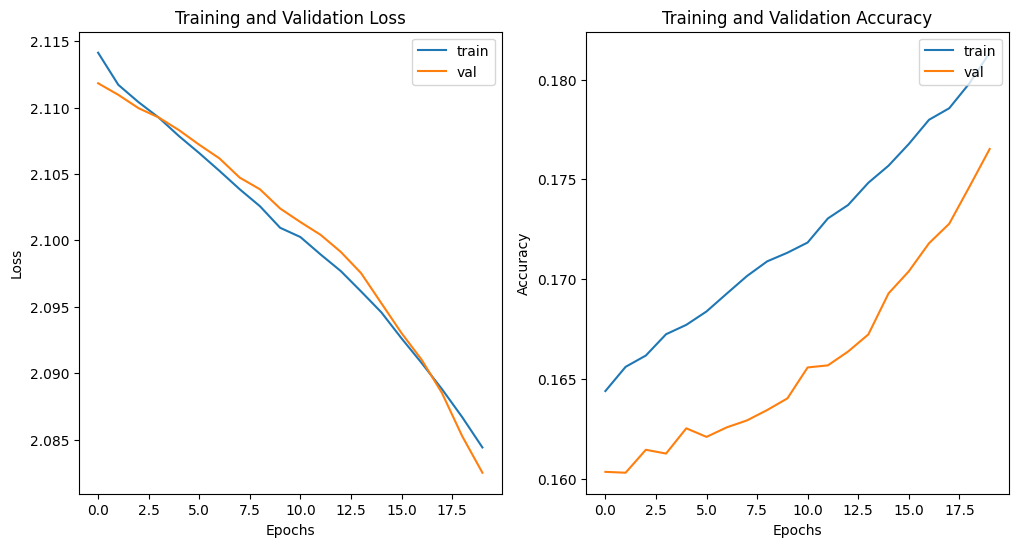

In [17]:
loss_acc_plot(history1)

From the above training, it looks like the training loss decreasing and validation loss is also decreasing.

In [18]:
training_accuracy1 = history1.history['accuracy'][-1]
training_loss1 = history1.history['loss'][-1]
print(f"Training Loss: {training_loss1:.4f}, Training Accuracy: {training_accuracy1:.4f}")

Training Loss: 2.0844, Training Accuracy: 0.1813


In [20]:
val_loss1, val_accuracy1 = ann_model.evaluate(x_test,y_test)
print(f"Done!\nValiation Loss: {val_loss1:.4f}, Validation Accuracy: {val_accuracy1:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 2.0825 - accuracy: 0.1765
Done!
Valiation Loss: 2.0825, Validation Accuracy: 0.1765
